# Loan Data Classification NN #
Using information about users in a lendingclub database, we'll use a neural network to try and predict whether or not a new customer will pay back a loan amount.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
cf.go_offline()

In [2]:
info = pd.read_csv("lending_club_info.csv")
info.set_index("LoanStatNew",inplace=True)
info
#this dataframe can be used to grab information about any of the column names

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [3]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


### Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

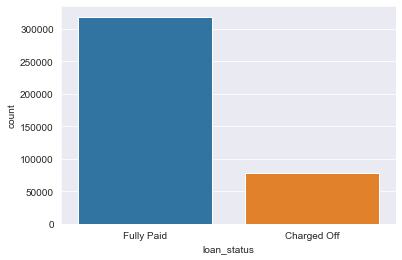

In [5]:
sns.countplot(df["loan_status"])

<AxesSubplot:>

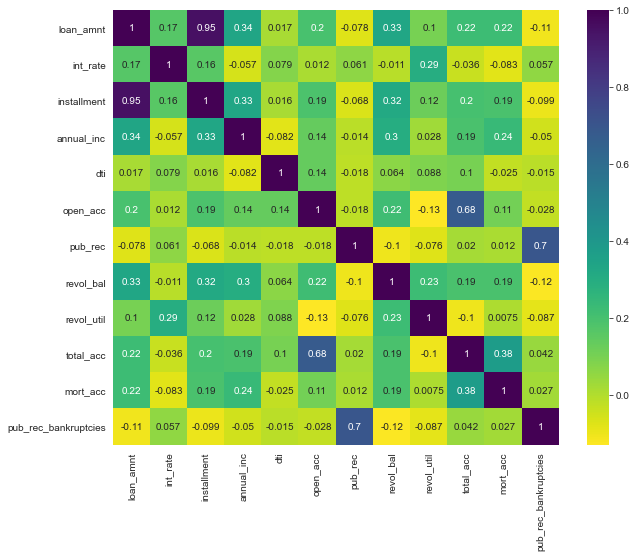

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="viridis_r",annot=True)

In [7]:
df.corr()["loan_amnt"].sort_values(ascending=False)

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64

For fully paid loans, it appears that there's a very high correlation between loan_amnt and installment

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

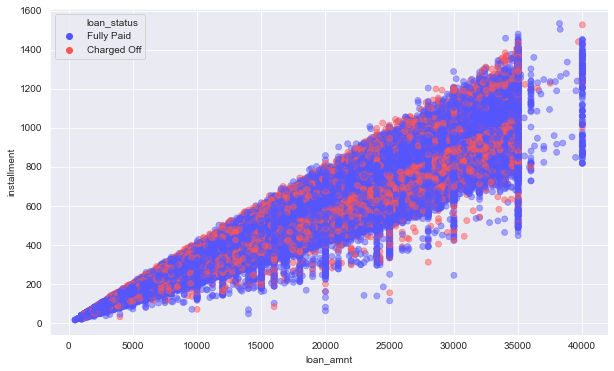

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="loan_amnt",y="installment",hue="loan_status",palette="seismic",alpha=0.5,edgecolor=None)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

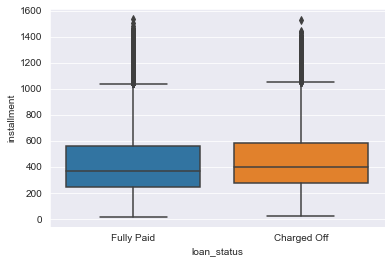

In [9]:
sns.boxplot(data=df,x="loan_status",y="installment")

In [10]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


There aren't huge differences between charged off or fully paid loans in terms of loan amount statistics

In [11]:
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [12]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:ylabel='count'>

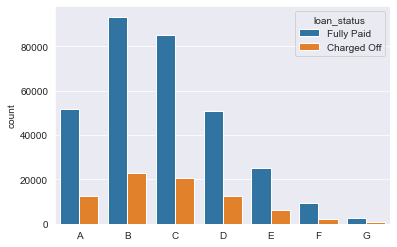

In [13]:
sns.countplot(sorted(df["grade"]),hue=df["loan_status"])

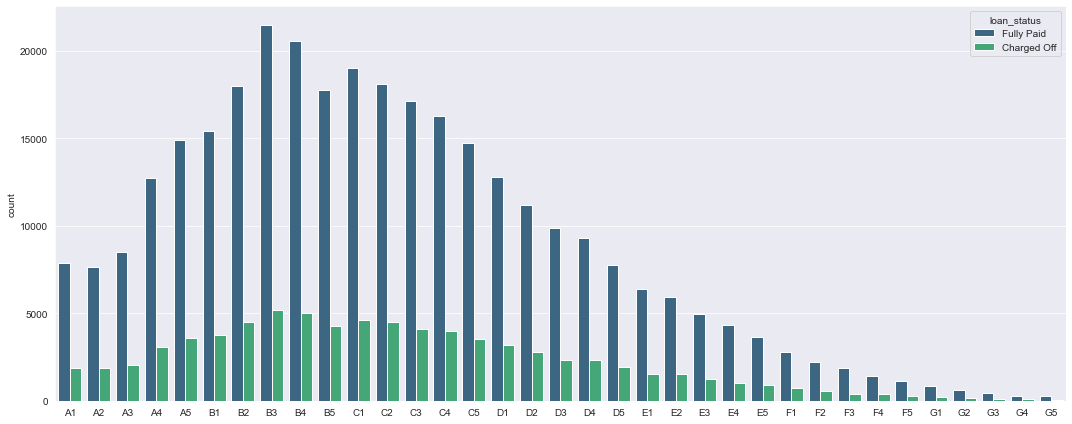

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(sorted(df["sub_grade"]),hue=df["loan_status"],palette="viridis")
plt.tight_layout()

In [15]:
df["loan_repaid"]=pd.get_dummies(df["loan_status"],drop_first=True)
df.drop("loan_status",axis=1,inplace=True)

In [16]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


<AxesSubplot:>

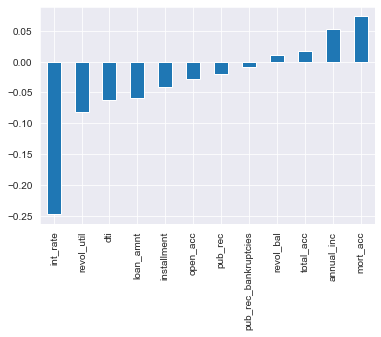

In [17]:
df.corr()["loan_repaid"].sort_values(ascending=True).drop("loan_repaid").plot(kind="bar")

### Data Preprocessing ###

Let's see if any of the columns contain null values, and either get rid or fill them in as appropriate

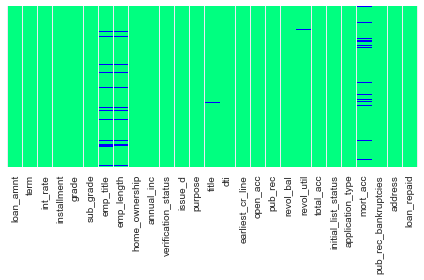

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="winter_r",edgecolor=None)
plt.tight_layout()

In [19]:
df.isnull().sum().sort_values(ascending=False).head(6) #shows number of null entries

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
dtype: int64

In [20]:
(100*df.isnull().sum()/len(df)).sort_values(ascending=False).head(6) #shows percentage of null entries

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64

In [21]:
df["emp_title"].nunique()

173105

In [22]:
df.drop("emp_title",axis=1,inplace=True) #there are way too many different job titles to try and replace with dummy variables

In [23]:
df["emp_length"].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

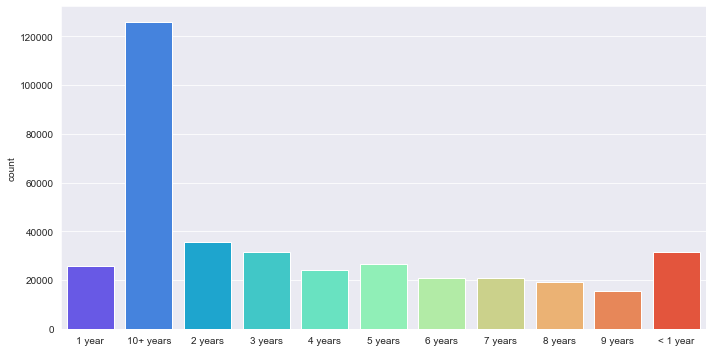

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(sorted(df["emp_length"].dropna()),palette="rainbow")
plt.tight_layout()

<AxesSubplot:xlabel='emp_length', ylabel='count'>

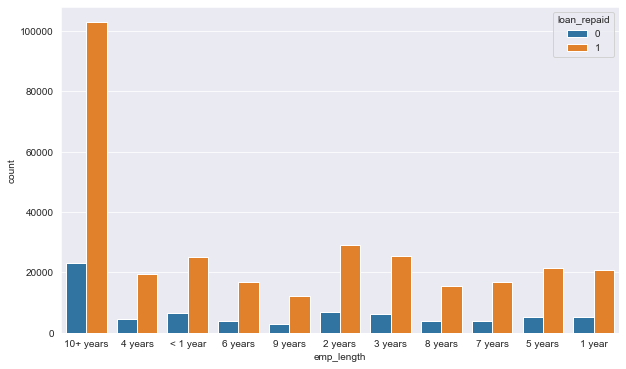

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(df["emp_length"],hue=df["loan_repaid"])

In [26]:
emp_length_charged_off = df[df["loan_repaid"]==0].groupby("emp_length").count()["loan_repaid"]
emp_length_charged_off.head()

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
Name: loan_repaid, dtype: int64

In [27]:
emp_length_fully_paid = df[df["loan_repaid"]==1].groupby("emp_length").count()["loan_repaid"]
emp_length_fully_paid.head()

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
Name: loan_repaid, dtype: int64

In [28]:
emp_prop_charged_off = emp_length_charged_off/emp_length_fully_paid
emp_prop_charged_off

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_repaid, dtype: float64

<AxesSubplot:xlabel='emp_length'>

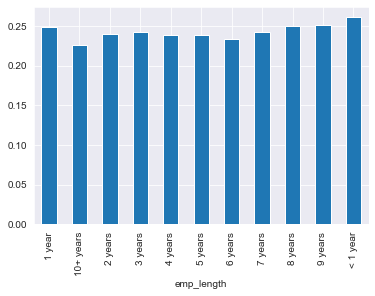

In [29]:
emp_prop_charged_off.plot(kind="bar")

In [30]:
df.drop("emp_length",axis=1,inplace=True) #the charge off proportion is too similar across all emp_lengths for us to do anything

In [31]:
df["purpose"].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [32]:
df["title"].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [33]:
df.drop("title",axis=1,inplace=True) #the title column just contained some more detailed descriptions of the purpose column

In [34]:
df["mort_acc"].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

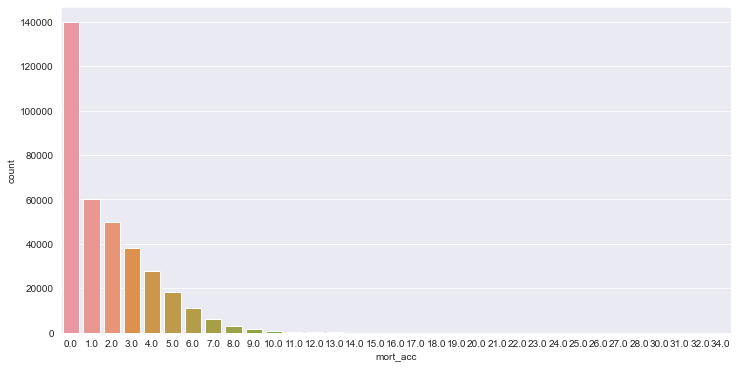

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(df["mort_acc"])

In [36]:
df.corr()["mort_acc"].sort_values(ascending=False) 
#from this we can see that there's a reasonably high correlation with total_acc, which we can use to fill in the null entries

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [37]:
total_acc_avg = df.groupby("total_acc").mean()["mort_acc"].round() 
total_acc_avg.value_counts()
#we'll fill in the null entries for mort_acc with the rounded mean values of the corresponding total_acc values

3.0    54
2.0    21
1.0    14
0.0    14
4.0    11
8.0     2
5.0     2
Name: mort_acc, dtype: int64

In [38]:
def mort_acc_filler(total_acc,mort_acc):
    """
    Fills in null entries for the mort_acc column with the corresponding rounded mean value of the total_acc entry.
    """
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [39]:
df["mort_acc"] = df.apply(lambda x: mort_acc_filler(x["total_acc"],x["mort_acc"]),axis=1)

In [40]:
(100*df.isnull().sum()/len(df)).sort_values(ascending=False).head() #we now only have null entries for a very small % of the df

pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
purpose                 0.000000
term                    0.000000
dtype: float64

In [41]:
df.dropna(inplace=True) 
#we can just drop the rows with null entries because they only account for less than 0.2% of the dataframe

In [42]:
df.isnull().sum().unique() 

array([0], dtype=int64)

<div class="alert-success" >
    We no longer have any null values in our dataframe!

### Feature Engineering ###

Let's see which features we need to convert into something that a ML model can interpret

In [43]:
df.select_dtypes("object").columns
#let's see if we can edit these text columns into something our ML model can interpret

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [44]:
df["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [45]:
df["term"] = df["term"].apply(lambda x: int(x[0:3]))

In [46]:
#grade is just a part of subgrade so we may as well drop it from the dataframe
df.drop("grade",axis=1,inplace=True)

In [47]:
sub_grade_dummies = pd.get_dummies(df["sub_grade"],drop_first=True)

In [48]:
df = pd.concat([df.drop("sub_grade",axis=1),sub_grade_dummies],axis=1)

In [49]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [50]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [51]:
df["home_ownership"] = df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [52]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [53]:
home_ownership_dummmies = pd.get_dummies(df["home_ownership"],drop_first=True)

In [54]:
df = pd.concat([df.drop("home_ownership",axis=1),home_ownership_dummmies],axis=1)

In [55]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [56]:
df["issue_d"] #if we were to run a ML model which decides whether or not to issue someone a loan, we wouldn't have an issue date
#therefore, it makes sense to remove this column

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [57]:
df.drop("issue_d",axis=1,inplace=True)

In [58]:
df.select_dtypes("object").columns

Index(['verification_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [59]:
print(df["verification_status"].value_counts())

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64


In [60]:
print(df["purpose"].value_counts())

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64


In [61]:
print(df["initial_list_status"].value_counts())

f    237346
w    157873
Name: initial_list_status, dtype: int64


In [62]:
print(df["application_type"].value_counts())

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64


All of the four columns above don't require any extra changes, so we can turn them all into dummy variables at once.

In [63]:
more_dummies = pd.get_dummies(df[["verification_status","purpose","initial_list_status","application_type"]],drop_first=True)

In [64]:
df = df.drop(["verification_status","purpose","initial_list_status","application_type"],axis=1)
df = pd.concat([df,more_dummies],axis=1)

In [65]:
df.select_dtypes("object").columns

Index(['earliest_cr_line', 'address'], dtype='object')

In [66]:
df["earliest_cr_line"]

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [67]:
info.loc["earliest_cr_line"][-1]
#we can use this information and convert the timestamps into years, so that our ML model has numerical data to work with

"The month the borrower's earliest reported credit line was opened"

In [68]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"]).apply(lambda x: x.year) 

In [69]:
df["earliest_cr_line"].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [70]:
df["address"].head()
#the only numerical data we can use from this are the zip codes at the end of the strings

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [71]:
df["address"] = df["address"].apply(lambda x: int(x[-5:]))

In [72]:
df["address"].value_counts() #now we can convert these zip-codes into dummy variables

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: address, dtype: int64

In [73]:
address_dummies = pd.get_dummies(df["address"],drop_first=True)
df = pd.concat([df.drop("address",axis=1),address_dummies],axis=1)

In [74]:
df.select_dtypes("object").columns 

Index([], dtype='object')

<div class="alert-success">
    We have now converted all the features of our dataframe into formats that our ML model can interpret!

### Creating the Neural Network ###

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop("loan_repaid",axis=1).values
y = df["loan_repaid"].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=15)

In [83]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          batch_size=256,
          callbacks=[early_stop],
          )

Train on 296414 samples, validate on 98805 samples
Epoch 1/200
296414/296414 [==============================] - 5s 17us/sample - loss: 0.3146 - accuracy: 0.8732 - val_loss: 0.2635 - val_accuracy: 0.8888
Epoch 2/200
296414/296414 [==============================] - 4s 13us/sample - loss: 0.2696 - accuracy: 0.8876 - val_loss: 0.2609 - val_accuracy: 0.8888
Epoch 3/200
296414/296414 [==============================] - 4s 14us/sample - loss: 0.2656 - accuracy: 0.8878 - val_loss: 0.2601 - val_accuracy: 0.8888
Epoch 4/200
296414/296414 [==============================] - 4s 13us/sample - loss: 0.2636 - accuracy: 0.8881 - val_loss: 0.2598 - val_accuracy: 0.8889
Epoch 5/200
296414/296414 [==============================] - 4s 14us/sample - loss: 0.2630 - accuracy: 0.8878 - val_loss: 0.2596 - val_accuracy: 0.8888
Epoch 6/200
296414/296414 [==============================] - 4s 13us/sample - loss: 0.2622 - accuracy: 0.8877 - val_loss: 0.2593 - val_accuracy: 0.8888
Epoch 7/200
296414/296414 [==========

In [85]:
model_loss = pd.DataFrame(model.history.history)
model_loss.iplot(title="Loss vs Epochs",xTitle="Epochs",yTitle="loss")

### Evaluating Model Performance ###

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
predictions = model.predict_classes(X_test)

In [88]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[ 8403 10904]
 [   84 79414]]


              precision    recall  f1-score   support

           0       0.99      0.44      0.60     19307
           1       0.88      1.00      0.94     79498

    accuracy                           0.89     98805
   macro avg       0.93      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



<div class="alert-info">
    Our model has very good precision, however our recall and f1 score aren't quite as good. Nevertheless, 89% accuracy isn't too bad, considering how imbalanced our data is.

### Testing Model on New Customer ###

In [89]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))
#we'll grab data from some random customer and pass it in as though we have a new customer
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
#these are their details
new_customer.sort_values(ascending=False).head(17)

annual_inc                      61665.00
revol_bal                       27778.00
loan_amnt                       25000.00
earliest_cr_line                 1996.00
installment                       638.11
revol_util                         65.50
term                               60.00
total_acc                          46.00
dti                                30.11
int_rate                           18.24
open_acc                           16.00
D5                                  1.00
verification_status_Verified        1.00
purpose_debt_consolidation          1.00
RENT                                1.00
30723                               1.00
application_type_INDIVIDUAL         1.00
Name: 305323, dtype: float64

By our model prediction, will he pay the loan?

In [90]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

Did he actually pay back the loan?

In [91]:
df.iloc[random_ind]['loan_repaid']

1.0

<div class="alert-success">
    Our model successfully predicted the loan payment of our random customer!